Se analiza la cantidad de picos presentes en el espectro.
Se toma como ejemplo la imagen A4451 (fuente HD166734), el cual contiene 4 espectros.

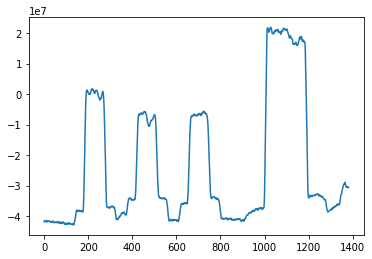

In [2]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks

from astropy.io import fits
import numpy as np                          

hdu_list = fits.open('fits/A4451-HD166734.fits')
#hdu_list.info()
#La informacion anterior(file fits) como una matriz(dimension de la imagen)
matriz_2 = hdu_list[0].data #info ppal de cabecera 
vect_2= np.apply_along_axis(sum, 0, matriz_2) #suma columnas
#len(vect_2),vect_2.max(),vect_2.min()
plt.plot(range(0,len(vect_2)),vect_2)


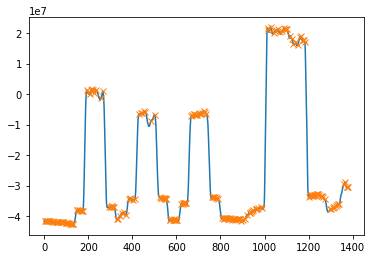

In [6]:
x = vect_2
peaks, _ = find_peaks(x)
np.diff(peaks)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

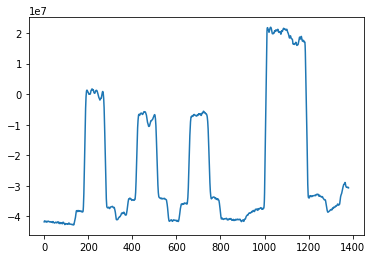

In [8]:
from scipy.signal import savgol_filter
f1 = savgol_filter(x, 5, 2)
plt.plot(f1)
plt.show()

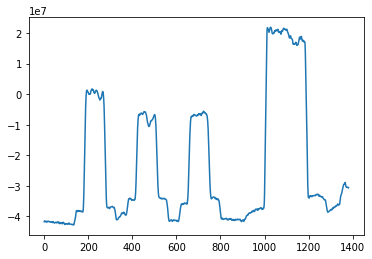

In [9]:
f2 = savgol_filter(x, 5, 2, mode='nearest')
plt.plot(f2)
plt.show()

In [10]:
peaks, properties = find_peaks(x, prominence=1, width=20)
properties["prominences"], properties["widths"]

(array([43491754., 35477584., 36164299., 60551800.,  1978543.,  1208141.]),
 array([ 93.47979393,  94.05895096,  92.60932221, 186.19250206,
         21.98005519,  30.47115005]))

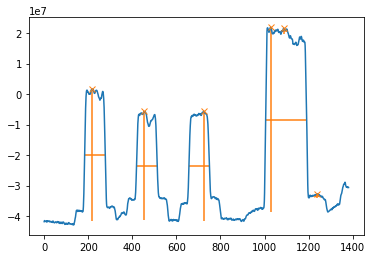

In [11]:
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.vlines(x=peaks, ymin=x[peaks] - properties["prominences"], ymax = x[peaks], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"], xmax=properties["right_ips"], color = "C1")
plt.show()

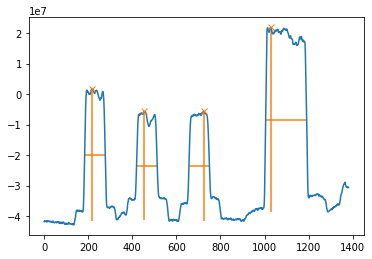

In [13]:
peaks, properties = find_peaks(x, prominence=2, width=40)
properties["prominences"], properties["widths"]
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.vlines(x=peaks, ymin=x[peaks] - properties["prominences"], ymax = x[peaks], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"], xmax=properties["right_ips"], color = "C1")
plt.show()

In [17]:
peaks

array([ 217,  454,  723, 1028], dtype=int64)

Se analiza la imagen A4505 (fuente NGC2346), la cual posee 2 espectros.
Observación: el espectro de ciencia derecho posee menor intensidad que sus lámparas de comparación.

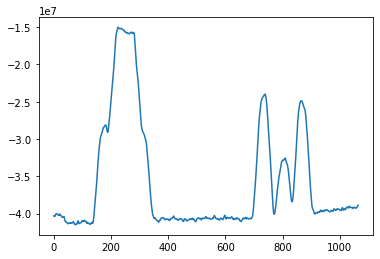

In [18]:
hdu_list = fits.open('fits/A4505-NGC2346.fits')
matriz_2 = hdu_list[0].data
x1 = np.apply_along_axis(sum, 0, matriz_2) #suma columnas
plt.plot(range(0,len(x1)),x1)


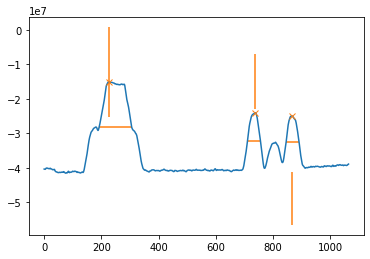

In [22]:
peaks, properties = find_peaks(x1, prominence=3, width=40)
properties["prominences"], properties["widths"]
plt.plot(x1)
plt.plot(peaks, x1[peaks], "x")
plt.vlines(x=peaks, ymin=x[peaks] - properties["prominences"], ymax = x[peaks], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"], xmax=properties["right_ips"], color = "C1")
plt.show()